In [1]:
import numpy as np
import cv2 as cv
import shutil
import math
import os

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-02-27 04:32:35.370164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740630755.411214 2775952 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740630755.429633 2775952 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available:  1


In [4]:
# Original Image size in Inria Aerial Image Dataset
master_size = 5000

# Desired tile size  
image_size = 384

# Overlap percentage 
overlap = 0.3

# working directory 
root_folder = os.getcwd()

# Original dataset folder 
data_folder = os.path.join(root_folder, 'AerialImageDataset')

In [5]:

# Original dataset folders
src_train_folder = os.path.join(data_folder, 'train', 'images')
src_train_folder_gt = os.path.join(data_folder, 'train', 'gt')
src_test_folder = os.path.join(data_folder, 'test', 'images')

print('Training images address    = ', src_train_folder)
print('Training gt images address = ', src_train_folder_gt)
print('Testing images address     = ', src_test_folder)



Training images address    =  /home/stanley/Projects/pgmp/AerialImageDataset/train/images
Training gt images address =  /home/stanley/Projects/pgmp/AerialImageDataset/train/gt
Testing images address     =  /home/stanley/Projects/pgmp/AerialImageDataset/test/images


In [6]:
# Training set file names
src_train_images = os.listdir(src_train_folder)
print(src_train_images)
print('Total number of main images = ',len(src_train_images))

['austin32.tif', 'austin2.tif', 'vienna8.tif', 'tyrol-w15.tif', 'austin6.tif', 'tyrol-w22.tif', 'vienna28.tif', 'tyrol-w12.tif', 'austin8.tif', 'tyrol-w24.tif', 'vienna16.tif', 'vienna15.tif', 'austin21.tif', 'austin3.tif', 'vienna36.tif', 'vienna21.tif', 'tyrol-w9.tif', 'austin11.tif', 'austin1.tif', 'vienna14.tif', 'tyrol-w33.tif', 'tyrol-w25.tif', 'vienna33.tif', 'vienna20.tif', 'vienna22.tif', 'vienna2.tif', 'vienna35.tif', 'vienna17.tif', 'tyrol-w35.tif', 'vienna4.tif', 'tyrol-w21.tif', 'austin33.tif', 'austin36.tif', 'tyrol-w2.tif', 'tyrol-w20.tif', 'vienna3.tif', 'tyrol-w6.tif', 'tyrol-w27.tif', 'tyrol-w4.tif', 'vienna31.tif', 'vienna13.tif', 'tyrol-w5.tif', 'tyrol-w34.tif', 'tyrol-w10.tif', 'austin19.tif', 'tyrol-w23.tif', 'austin15.tif', 'austin34.tif', 'austin23.tif', 'tyrol-w29.tif', 'vienna19.tif', 'austin26.tif', 'tyrol-w11.tif', 'austin25.tif', 'vienna27.tif', 'austin5.tif', 'austin9.tif', 'austin30.tif', 'austin18.tif', 'tyrol-w16.tif', 'vienna26.tif', 'tyrol-w13.tif', '

In [7]:
# Testing set file names
src_test_images = os.listdir(src_test_folder)
print(src_test_images)

['tyrol-e18.tif', 'sfo34.tif', 'bellingham33.tif', 'innsbruck14.tif', 'sfo21.tif', 'bloomington36.tif', 'innsbruck8.tif', 'bloomington25.tif', 'bellingham36.tif', 'sfo27.tif', 'bellingham23.tif', 'bellingham29.tif', 'bellingham4.tif', 'bellingham8.tif', 'bloomington24.tif', 'tyrol-e23.tif', 'bellingham28.tif', 'tyrol-e14.tif', 'bloomington9.tif', 'sfo14.tif', 'innsbruck12.tif', 'bellingham20.tif', 'tyrol-e28.tif', 'sfo15.tif', 'bellingham26.tif', 'innsbruck18.tif', 'bellingham31.tif', 'tyrol-e3.tif', 'innsbruck6.tif', 'innsbruck24.tif', 'innsbruck23.tif', 'bellingham11.tif', 'tyrol-e25.tif', 'bellingham16.tif', 'sfo8.tif', 'sfo36.tif', 'sfo32.tif', 'tyrol-e30.tif', 'sfo12.tif', 'bloomington21.tif', 'bellingham18.tif', 'innsbruck5.tif', 'bellingham25.tif', 'tyrol-e24.tif', 'bellingham15.tif', 'bloomington31.tif', 'sfo23.tif', 'tyrol-e15.tif', 'tyrol-e21.tif', 'sfo13.tif', 'innsbruck27.tif', 'tyrol-e22.tif', 'sfo5.tif', 'innsbruck31.tif', 'bellingham17.tif', 'bloomington14.tif', 'bloomin

In [8]:
# set destination folders

# train_folder_root = os.path.join(data_folder, 'train_{}x{}'.format(image_size, image_size))
# train_folder = os.path.join(train_folder_root, 'images')
# train_folder_gt = os.path.join(train_folder_root, 'gt')

# print(train_folder_root)
# print(train_folder)
# print(train_folder_gt)

In [9]:
# Creating destination folder root 
# if not os.path.exists(train_folder_root):
#     os.makedirs(train_folder_root)

# # Creating destination training folder     
# if not os.path.exists(train_folder):
#     os.makedirs(train_folder)
# else:
#     shutil.rmtree(train_folder)

# # Creating destination training gt folder       
# if not os.path.exists(train_folder_gt):
#     os.makedirs(train_folder_gt)
# else:
#     shutil.rmtree(train_folder_gt)

In [10]:
# find the number of tiles with 0.3 percent overlap
#  (5000)/(384-(384*0.3)) 

count = math.ceil((master_size / (image_size-(image_size*overlap))))

# find the number of pixels for each step 
step = (master_size - image_size * overlap) / count
print('count =', count, ', step =', step)

count = 19 , step = 257.09473684210525


In [11]:
# slicing the main images and ground truths into tiles of 384 * 384 pixels
# each 5000 * 5000 source will be divided into 19 * 19 = 361 tiles

# for filename in src_train_images:
#     print(filename)
#     master_img = cv.imread(os.path.join(src_train_folder, filename))
#     master_img_gt = cv.imread(os.path.join(src_train_folder_gt, filename))

#     for i in range(count):
#         if i < count - 1:
#             y = round(i * step)
#         else:
#             y = master_size - image_size # last tile of the column 

#         for j in range(count):
#             if j < count - 1:
#                 x = round(j * step)
#             else:
#                 x = master_size - image_size # last tile of the row 
                
                
# # Slice the main image based on (x,y)  first go ====>>> img = master_img[0:0+384, 0:0+384] = img = master_img[0:384,0:384]
#             img = master_img[y:y+image_size, x:x+image_size]
#             img_gt = master_img_gt[y:y+image_size, x:x+image_size]
        
# # write the slice (tile) into disk 
# # filename[:-4] ?? to get rid of file extension in original filename (ex: austin1.tif ==>>>  austin1 )

#             img_fname = '{}_{}_{}.{}'.format(filename[:-4], i, j, 'jpg')
#             img_gt_fname = '{}_{}_{}.{}'.format(filename[:-4], i, j, 'png')
#             cv.imwrite(os.path.join(train_folder, img_fname), img)
#             cv.imwrite(os.path.join(train_folder_gt, img_gt_fname), img_gt)

In [12]:
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
# from tqdm import tqdm
# from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Input, Dropout, Lambda, Conv2D, MaxPooling2D, Dense, Layer, UpSampling2D, RandomFlip, RandomRotation,BatchNormalization,Activation
from keras.layers import Concatenate, Dot, Conv2DTranspose, MaxPool2D, multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import glob
import matplotlib.image as img
from skimage.transform import rescale, resize

%matplotlib inline

In [13]:
cd = os.getcwd()
print(cd)

/home/stanley/Projects/pgmp


In [14]:
# color input images
IMG_CHANNELS = 3

# image dimension 
IMG_WIDTH = 384
IMG_HEIGHT = 384
BATCH_SIZE = 2



TRAIN_PATH = glob.glob('AerialImageDataset//train_384x384//images//*')
GT_PATH = glob.glob('AerialImageDataset//train_384x384//gt//*')
# TEST_PATH = glob.glob('AerialImageDataset//test//images//*')


In [15]:
seed = 42
random.seed(seed)
np.random.seed = seed

In [16]:
# Get training, gt and test full path file names

train_ids = [fn for fn in TRAIN_PATH]
gt_ids = [fn for fn in GT_PATH]

In [17]:
print('Total number of images in training set = ', len(train_ids))

Total number of images in training set =  38988


In [18]:
def split_dataset(image_paths, gt_paths, validation_split=0.2, test_split = 0.3):
    """Splits the dataset into training and validation sets."""
    # Ensure the random selection is reproducible
    random.seed(42)

    # Remove file extensions to match images with ground truth
    images_dict = {os.path.splitext(os.path.basename(path))[0]: path for path in image_paths}
    gt_dict = {os.path.splitext(os.path.basename(path))[0]: path for path in gt_paths}

    # Combine image and ground truth paths based on matching filenames
    combined = [(images_dict[key], gt_dict[key]) for key in images_dict.keys() if key in gt_dict]
    
    # Shuffle the combined list
    random.shuffle(combined)

    # Unzip the shuffled list back into image and ground truth paths
    shuffled_image_paths, shuffled_gt_paths = zip(*combined)
    
    # Seperate training and testing data
    test_index = int(len(shuffled_image_paths) * test_split)
    
    train_image_data = shuffled_image_paths[test_index:]
    train_gt_data = shuffled_gt_paths[test_index:]
    
    # Extract tests data
    test_image_paths = shuffled_image_paths[:test_index]
    test_gt_paths = shuffled_gt_paths[:test_index]
     
    # Calculate split index
    split_index = int(len(train_image_data) * (1 - validation_split))
    
    # Split into training and validation sets
    train_image_paths = train_image_data[:split_index]
    train_gt_paths = train_gt_data[:split_index]
    val_image_paths = train_image_data[split_index:]
    val_gt_paths = train_gt_data[split_index:] 

    return train_image_paths, train_gt_paths, val_image_paths, val_gt_paths, test_image_paths, test_gt_paths


In [19]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Function to process images & ground truth in batches
# def process_images_and_labels_in_batches(image_paths, gt_paths, batch_size=16):
#     """Lazily loads images & corresponding ground truth masks in batches to reduce memory usage."""
#     for i in range(0, len(image_paths), batch_size):
#         batch_img_paths = image_paths[i : i + batch_size]
#         batch_gt_paths = gt_paths[i : i + batch_size]

#         # Load and normalize images
#         batch_images = [img_to_array(load_img(img_path)) / 255.0 for img_path in batch_img_paths]
#         batch_images = np.array(batch_images)
#         batch_images = batch_images.astype('float32')

#         # Load and normalize ground truth (GT) masks
#         Y_train = np.zeros((len(batch_gt_paths), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
#         batch_gt = [img_to_array(load_img(gt_path, color_mode="grayscale")) / 255.0 for gt_path in batch_gt_paths]
#         batch_gt = np.array(batch_gt)
#         batch_gt = np.maximum(Y_train, batch_gt)

#         yield batch_images, batch_gt 

In [20]:
# Split the dataset
train_image_paths, train_gt_paths, val_image_paths, val_gt_paths, test_image_paths, test_gt_paths = split_dataset(train_ids, gt_ids)

In [21]:
print(f'Train Data count: {len(train_image_paths)}')
print(f'Train GT count: {len(train_gt_paths)}')
print(f'Test Data count: {len(test_image_paths)}')
print(f'Test GT count: {len(test_gt_paths)}')
print(f'Val Data count: {len(val_image_paths)}')
print(f'Val GT count: {len(val_gt_paths)}')

Train Data count: 21833
Train GT count: 21833
Test Data count: 11696
Test GT count: 11696
Val Data count: 5459
Val GT count: 5459


In [22]:
def parse_image(img_path, gt_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0

    gt = tf.io.read_file(gt_path)
    gt = tf.image.decode_png(gt, channels=1)
    gt = tf.image.resize(gt, [IMG_HEIGHT, IMG_WIDTH])
    gt = tf.cast(gt, tf.float32) / 255.0

    return img, gt


In [23]:
def create_dataset(image_paths, gt_paths, batch_size=16):
    def generator():
        for img_path, gt_path in zip(image_paths, gt_paths):
            yield img_path, gt_path

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(), dtype=tf.string),
            tf.TensorSpec(shape=(), dtype=tf.string)
        )
    )

    def map_fn(img_path, gt_path):
        img, gt = tf.py_function(func=parse_image, inp=[img_path, gt_path], Tout=[tf.float32, tf.float32])
        img.set_shape([IMG_HEIGHT, IMG_WIDTH, 3])
        gt.set_shape([IMG_HEIGHT, IMG_WIDTH, 1])
        return img, gt

    dataset = dataset.map(map_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    dataset = dataset.repeat()
    
    return dataset 

In [24]:
# train_generator = process_images_and_labels_in_batches(train_image_paths, train_gt_paths, batch_size=4)
# val_generator = process_images_and_labels_in_batches(val_image_paths, val_gt_paths, batch_size=4)

In [25]:
# Create datasets for training and validation
train_dataset = create_dataset(train_image_paths, train_gt_paths, batch_size=BATCH_SIZE)
val_dataset = create_dataset(val_image_paths, val_gt_paths, batch_size=BATCH_SIZE)

I0000 00:00:1740630759.952228 2775952 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:0a:00.0, compute capability: 8.9


# **Attention Model**

In [26]:
input_size = (IMG_HEIGHT,IMG_WIDTH,3)

In [27]:
import tensorflow as tf

def conv_block(x, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [28]:
def encoder_block(x, num_filters):
    x = conv_block(x, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [29]:
def attention_gate(g, s, num_filters):
    Wg = Conv2D(num_filters, 1, padding="same", kernel_regularizer=keras.regularizers.L2(l2=0.1))(g)
    Wg = BatchNormalization()(Wg)

    Ws = Conv2D(num_filters, 1, padding="same")(s)
    Ws = BatchNormalization()(Ws)

    out = Activation("relu")(Wg + Ws)
    out = Conv2D(num_filters, 1, padding="same")(out)
    out = Activation("sigmoid")(out)

    return out * s

In [30]:
def decoder_block(x, s, num_filters):
    x = UpSampling2D(interpolation="bilinear")(x)
    s = attention_gate(x, s, num_filters)
    x = Concatenate()([x, s])
    x = conv_block(x, num_filters)
    return x

In [31]:
def attention_unet(input_shape):
    """ Inputs """
    inputs = Input(input_shape)

    """ Encoder """
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    
    b1 = conv_block(p4, 1024)
    
    """ Decoder """
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    """ Outputs """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    """ Model """
    model = Model(inputs, outputs, name="Attention-UNET")
    return model

In [32]:
model2 = attention_unet(input_size)

In [33]:
model2.compile(optimizer = Adam(learning_rate=1e-2), loss = 'binary_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "Attention-UNET"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 384, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 384, 384,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 384, 384,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 384, 384,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 384, 384,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 384, 384,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 384, 384,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 192, 192,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 192, 192,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 192, 192,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 192, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 192, 192,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 192, 192,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 192, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 96, 96,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 96, 96,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 96, 96,    │      1,024 │ conv2d_4[0][0]  

 Total params: 32,805,697 (125.14 MB)

 Trainable params: 32,790,081 (125.08 MB)

 Non-trainable params: 15,616 (61.00 KB)

In [ ]:
  # Calculate steps_per_epoch and validation_steps
steps_per_epoch = len(train_image_paths) // BATCH_SIZE
validation_steps = len(val_image_paths) // BATCH_SIZE

In [34]:
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('./model_cp_0.keras', verbose=1, save_best_only=True)
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=1e-7, verbose=1)

In [ ]:
if tf.config.list_physical_devices('GPU'):
    results2 = model2.fit(
        train_dataset,
        validation_data = val_dataset,
        steps_per_epoch = steps_per_epoch,
        validation_steps = validation_steps,
        epochs=10 ,
        callbacks=[earlystopper, checkpointer,]
    )

Epoch 1/10


I0000 00:00:1740630771.301742 2776229 service.cc:148] XLA service 0x7f428000be80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740630771.301985 2776229 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
I0000 00:00:1740630772.885667 2776229 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-27 04:33:06.742785: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng24{k2=0,k13=2,k14=3,k18=0,k23=0} for conv (f32[2,256,192,192]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,192,192]{3,2,1,0}, f32[256,128,1,1]{3,2,1,0}, f32[256]{0}, f32[2,256,192,192]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":1},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_qu

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8635 - loss: 1.1056
Epoch 1: val_loss improved from inf to 0.33097, saving model to ./model_cp_0.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1365s 265ms/step - accuracy: 0.8635 - loss: 1.1054 - val_accuracy: 0.8823 - val_loss: 0.3310 - learning_rate: 0.0100
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.9199 - loss: 0.2595
Epoch 2: val_loss improved from 0.33097 to 0.23525, saving model to ./model_cp_0.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1319s 264ms/step - accuracy: 0.9199 - loss: 0.2595 - val_accuracy: 0.9197 - val_loss: 0.2352 - learning_rate: 0.0100
Epoch 3/10
 916/5000 ━━━━━━━━━━━━━━━━━━━━ 16:47 247ms/step - accuracy: 0.9310 - loss: 0.2494

2025-02-27 05:21:22.334473: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng65{k2=1,k5=3,k14=2} for conv (f32[1,768,96,96]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,96,96]{3,2,1,0}, f32[256,768,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-02-27 05:21:22.341455: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.212888204s
Trying algorithm eng65{k2=1,k5=3,k14=2} for conv (f32[1,768,96,96]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,96,96]{3,2,1,0}, f32[256,768,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9330 - loss: 0.2448
Epoch 3: val_loss did not improve from 0.23525
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1333s 267ms/step - accuracy: 0.9330 - loss: 0.2448 - val_accuracy: 0.8919 - val_loss: 0.2859 - learning_rate: 0.0100
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.9409 - loss: 0.2075
Epoch 4: val_loss improved from 0.23525 to 0.21099, saving model to ./model_cp_0.keras

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1317s 263ms/step - accuracy: 0.9409 - loss: 0.2075 - val_accuracy: 0.9183 - val_loss: 0.2110 - learning_rate: 0.0100
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.9515 - loss: 0.1311
Epoch 5: val_loss improved from 0.21099 to 0.15952, saving model to ./model_cp_0.keras
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1317s 263ms/step - accuracy: 0.9515 - loss: 0.1311 - val_accuracy: 0.9333 - val_loss: 0.1595 - learning_rate: 1.0000

In [36]:
model2.save('./models/model_0.keras')

In [37]:
history_dict = results2.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
print(accuracy, '\n', val_accuracy)

[0.8859895467758179, 0.924798846244812, 0.9354556798934937, 0.9420810341835022, 0.9519791007041931, 0.9548050761222839, 0.9557521343231201, 0.9572758078575134] 
 [0.8823416829109192, 0.9197160005569458, 0.8919481635093689, 0.918312668800354, 0.9332941770553589, 0.9319398999214172, 0.9169740080833435, 0.9133715033531189]


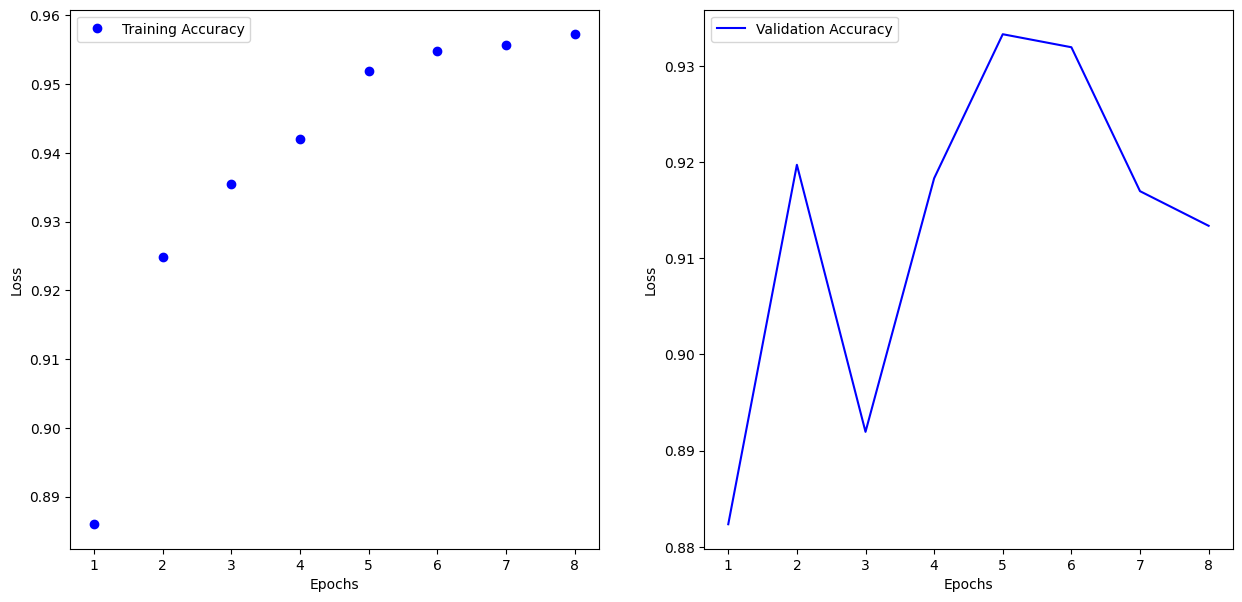

In [38]:
# Model 2 Accuracy Plot
epochs = range(1, len(accuracy) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

In [39]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
print(loss, '\n', val_loss)

[0.4181969165802002, 0.24718520045280457, 0.23807929456233978, 0.20478975772857666, 0.13002851605415344, 0.1226906031370163, 0.11899299919605255, 0.11102715879678726] 
 [0.330965518951416, 0.23524610698223114, 0.28585106134414673, 0.21099212765693665, 0.15951982140541077, 0.16153186559677124, 0.18029409646987915, 0.1843467801809311]


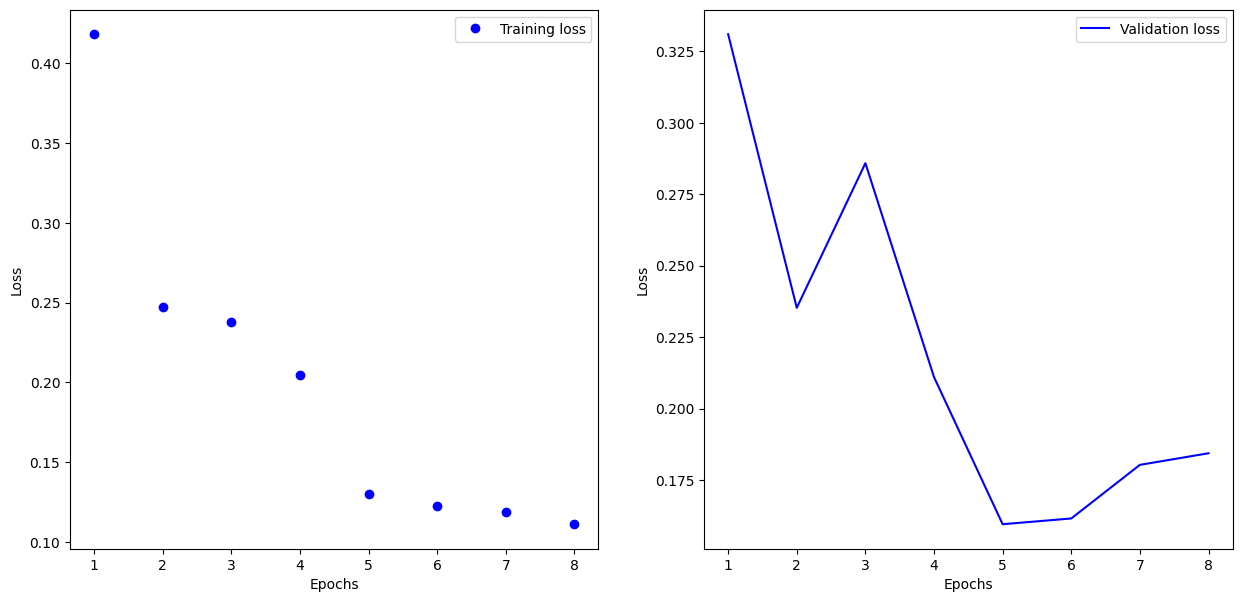

In [40]:
# Model 2 Loss plot
epochs1 = range(1, len(loss) + 1)
fig, axs = plt.subplots(1, 2, figsize=(15,7))
axs[0].plot(epochs, loss, 'bo', label='Training loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

# **Testing Models**

In [41]:
# load the Aug model
from tensorflow import keras
model1 = keras.models.load_model('models/model_0.keras')

In [42]:
model2 = keras.models.load_model('model_cp_0.keras')

In [43]:
model3 = keras.models.load_model('models/model_85.keras')

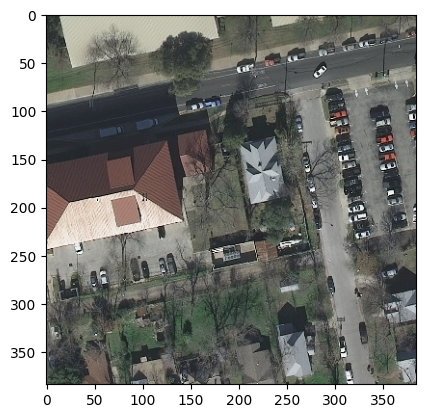

In [44]:
cat = img.imread('./AerialImageDataset/train_384x384/images/austin29_1_3.jpg')
resized_cat = resize(cat,(384,384,3))
plt.imshow(resized_cat, cmap='gray')
plt.show()

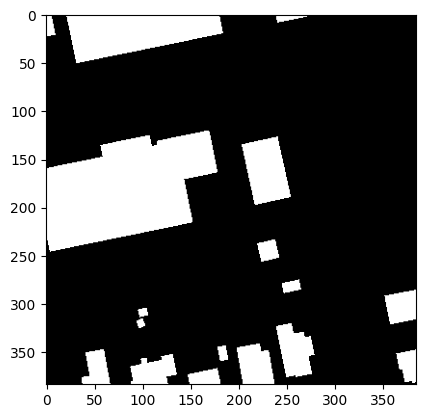

In [53]:
cat = img.imread('./AerialImageDataset/train_384x384/gt/austin29_1_3.png')
resized_cat = resize(cat,(384,384,1))
plt.imshow(resized_cat, cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


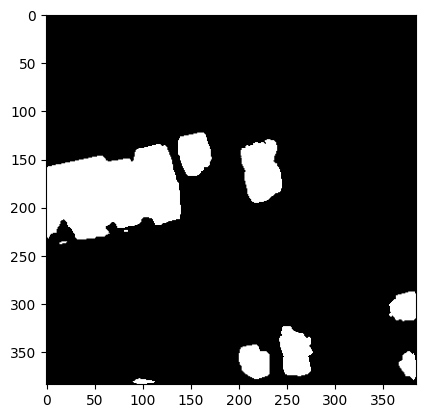

In [45]:
pred1 = model1.predict(np.expand_dims(resized_cat, 0))
image1 = pred1.reshape(384,384)*255
ret, pred1 = cv.threshold(image1, 120, 255, cv.THRESH_BINARY)
plt.imshow(pred1, cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


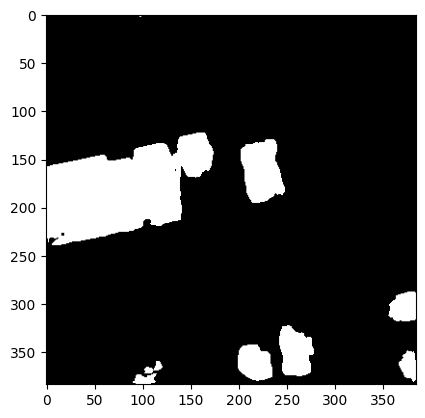

In [46]:
pred2 = model2.predict(np.expand_dims(resized_cat, 0))
image2 = pred2.reshape(384,384)*255
ret, pred2 = cv.threshold(image2, 120, 255, cv.THRESH_BINARY)
plt.imshow(pred2, cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


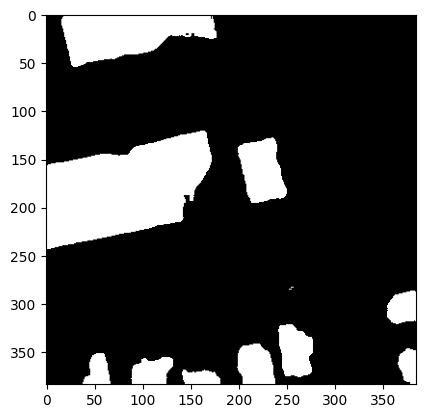

In [47]:
pred3 = model3.predict(np.expand_dims(resized_cat, 0))
image3 = pred3.reshape(384,384)*255
ret, pred3 = cv.threshold(image3, 125, 255, cv.THRESH_BINARY)
plt.imshow(pred3, cmap='gray')

In [48]:
from skimage.color import rgb2gray
def calc_iou(model, test_pt, gt_pt):
  iou=[]
  for count,fn in enumerate(test_pt):
      cat = img.imread(fn)
      cat = resize(cat,(384,384,3))
      pred = model.predict(np.expand_dims(cat, 0))
      pred = pred.reshape(384,384)*255
      ret, pred = cv.threshold(pred, 125, 255, cv.THRESH_BINARY)

      gt = img.imread(gt_pt[count])
      gt = resize(gt,(384,384,3))
      gt = rgb2gray(gt)

      intersection = np.logical_and(gt, pred)
      union = np.logical_or(gt, pred)
      iou_score = np.sum(intersection) / np.sum(union)
      iou.append(iou_score)
      return iou



In [49]:
iou_1 = calc_iou(model1, test_image_paths, test_gt_paths)
sum(iou_1) / len(iou_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


np.float64(0.5746557062026263)

In [50]:
iou_2 = calc_iou(model2, test_image_paths, test_gt_paths)
sum(iou_2) / len(iou_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


np.float64(0.7182119694953207)

In [51]:
iou_3 = calc_iou(model3, test_image_paths, test_gt_paths)
sum(iou_3) / len(iou_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


np.float64(0.8482979387882573)

In [52]:
cat = img.imread('/content/content/Dataset_1/test_384x384/images/austin20_0_11.jpg')
cat = resize(cat,(384,384,3))
plt.imshow(cat, cmap='gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/content/Dataset_1/test_384x384/images/austin20_0_11.jpg'

In [ ]:
pred = model2.predict(np.expand_dims(cat, 0))
pred = pred.reshape(384,384)*255
# ret, pred = cv2.threshold(pred, 150, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')

In [ ]:
red = model1.predict(np.expand_dims(cat, 0))
pred = pred.reshape(384,384)*255
ret, pred = cv2.threshold(pred, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(pred, cmap='gray')

In [ ]:
from skimage.color import rgb2gray
gt = img.imread('/content/content/Dataset_1/test_384x384/gt/austin20_0_11.png')
gt = resize(gt,(384,384,3))

gt = rgb2gray(gt)
plt.imshow(gt, cmap='gray')
plt.show()

In [ ]:
import numpy as np

In [ ]:
intersection = np.logical_and(gt, pred)
union = np.logical_or(gt, pred)
iou_score = np.sum(intersection) / np.sum(union)

In [ ]:
iou_score